In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [3]:
iris=load_iris()


In [8]:
X=iris.data
y=iris.target

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)

In [10]:
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=1)

In [12]:
pred=knn.predict([[2,4,3,1]])
pred

array([0])

In [14]:
pred=knn.predict([[2,4,3,1],[4,6,5,3]])
pred

array([0, 2])

In [16]:
knn5=KNeighborsClassifier(n_neighbors=5)
knn5.fit(X,y)
pred=knn5.predict([[2,4,3,1],[4,6,5,3]])
pred

array([0, 1])

In [17]:
knn8=KNeighborsClassifier(n_neighbors=8)
knn8.fit(X,y)
pred=knn8.predict([[2,4,3,1],[4,6,5,3]])
pred

array([0, 2])

In [20]:
predictions = {}
for i in range(1,31):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X,y)
    pred=knn.predict([[2,4,3,1],[4,6,5,3]])
    predictions[i]=pred

In [23]:
from sklearn.linear_model import LogisticRegression
logit =LogisticRegression()
logit.fit(X,y)
pred=logit.predict([[2,4,3,1],[4,6,5,3]])
print(pred)

[0 2]


E:\Tolu\PROGRAMS\Anaconda2\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [27]:
pred=logit.predict([[5.1,3.5,1.4,0.2],[6.3,3.3,4.7,1.6]])
print(pred)
pred=knn5.predict([[5.1,3.5,1.4,0.2],[6.3,3.3,4.7,1.6]])
print(pred)
pred=knn.predict([[5.1,3.5,1.4,0.2],[6.3,3.3,4.7,1.6]])
print(pred)
pred=knn8.predict([[5.1,3.5,1.4,0.2],[6.3,3.3,4.7,1.6]])
print(pred)

[0 1]
[0 1]
[0 1]
[0 1]


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.40, random_state=42)

In [39]:
knn5.fit(X_train,y_train)
pred=knn5.predict(X_test)
logit.fit(X_train, y_train)
pred_l =logit.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9833333333333333

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[23,  0,  0],
       [ 0, 19,  0],
       [ 0,  1, 17]], dtype=int64)

In [42]:

confusion_matrix(y_test, pred_l)

array([[23,  0,  0],
       [ 0, 19,  0],
       [ 0,  0, 18]], dtype=int64)

In [43]:
accuracy_score(y_test, pred_l)

1.0

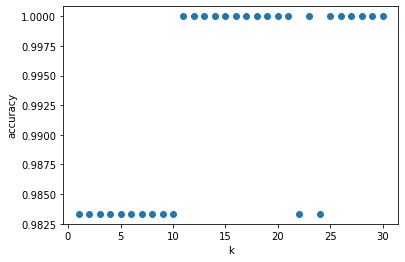

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.40, random_state=42)

acc = []
for i in range(1,31):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred=knn.predict(X_test)
    acc.append(accuracy_score(y_test, pred))

import matplotlib.pyplot as plt
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(range(1,31), acc)
plt.xticks([0,5,10,15,20,25,30]);


In [48]:
from sklearn.model_selection import cross_val_score
knn=KNeighborsClassifier(n_neighbors=5)
cvf=cross_val_score(knn, X, y, cv=10, scoring='accuracy')
cvf.mean()

0.9666666666666668

In [52]:
acc = []
for i in range(1,46):
    knn=KNeighborsClassifier(n_neighbors=i)
    cvf=cross_val_score(knn,X,y, cv=10, scoring='accuracy')
    acc.append(cvf.mean())

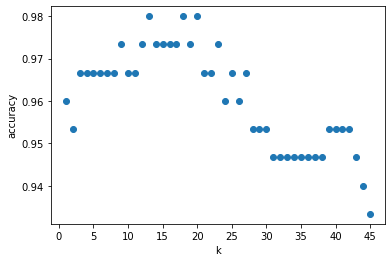

In [54]:
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(range(1,46), acc)
plt.xticks([0,5,10,15,20,25,30,35, 40,45]);

In [56]:
max(acc)

0.9800000000000001

In [57]:
acc.index(max(acc))

12